# Introduction to Data Engineering - Part 1

### Data Engineering is major for Data Scientists when
Data is Scattered<br>
Data is not Optimized for Analysis<br>
Legacy Code Causes Corrupt Data<br>

Data Engineering is all about: Gathering Data from Different Sources, Optimize Database for Analysis, Remove Corrupt Data
<br>
A Data Engineer is one that Develop, Tests, Constructsw and Maintains architectures such as Database & Large scale processing system. <br><br>They process - Large amount of Data; - Use Clusters of machines to do computing

Eg: They Set up scheduled ingestion of data from the application databases to an analytical database.


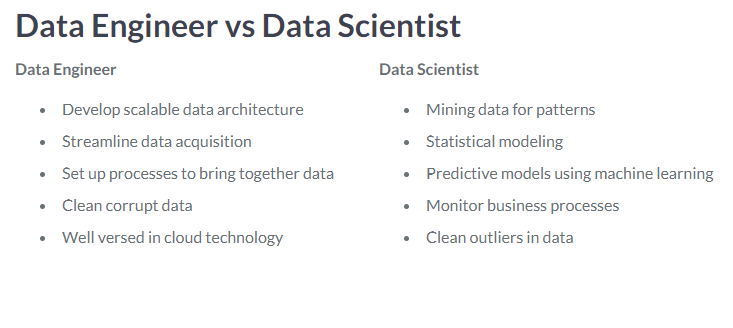

### Data Engineering Problems

Imagine you work in a medium-scale company that hosts an online market for pet toys. As the company is growing, there are unmistakably some technical growing pains.
As the first data engineer, you observe some problems and have to decide where you're best suited to be of help.?

<u>Soln:</u>
Data scientists are querying the online store databases directly and slowing down the functioning of the application since it's using the same database. So, The data engineer should make sure there's a separate database for analytics.

### Tools of a Data Engineer

A Data Engineer Moves data from Several Sources, Processes/Cleans data and finally loads it into Analytical Database.

Some Tools used for this are: <br><br>
Database - SQL,NoSQL :- MySQL, PostgreSQL <br>
Processing - Paralell Processing (Clean, Aggregate, Join) :- Spark, Hive <br>
Scheduling - Timely Job Scheduling :- Apache Airflow, Oozie, Cron(bash tool) <br>


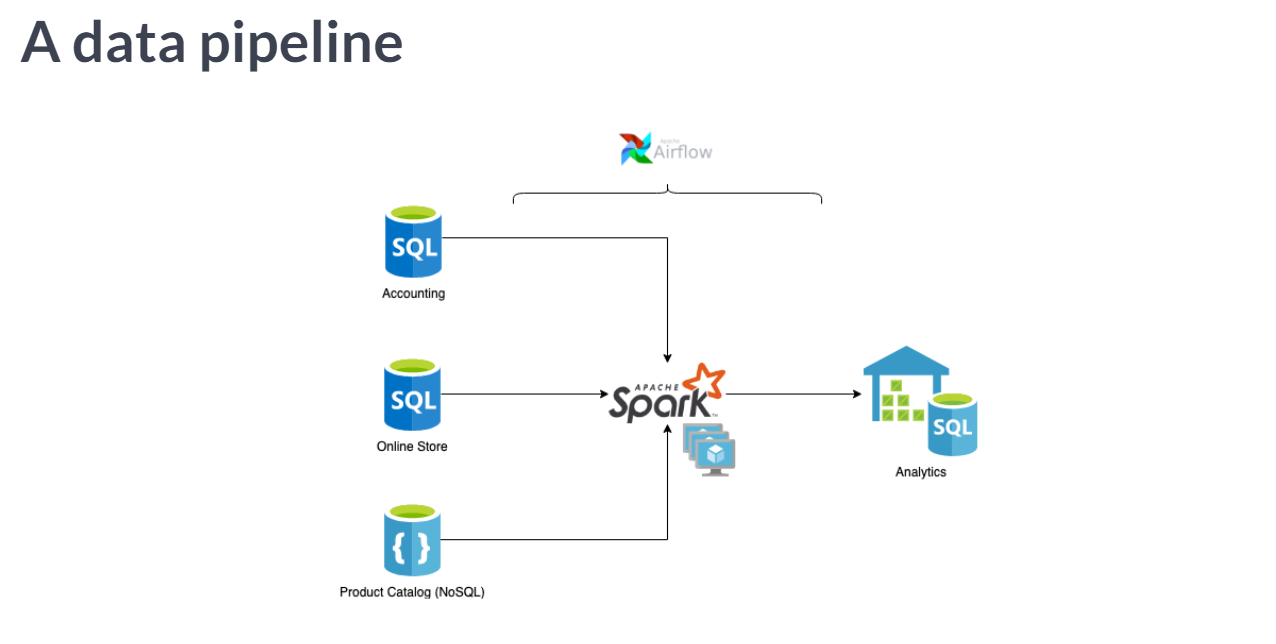

Procesing Tasks:<br>
Data engineers often have to join, clean, or organize data before loading it into a destination analytics database. This is done in the data processing, or data transformation step. <br>
Data processing is distributed over clusters of virtual machines.This makes it very easy to scale. If things are slowing down, assign some more virtual machines to the job.
They can also scale up the number of nodes when there's lots of data to be processed.

Scheduling Tasks:<br>
Scheduler is the glue of a data engineering system, holding each small piece together and organizing how they work together.
They make sure jobs run in a specific order and all dependencies are resolved correctly.<br>
Eg: They make sure the jobs run at midnight UTC each day.

### Cloud Providers

Data Engineers are Heavy users of the Cloud. 

Why Cloud: <br>


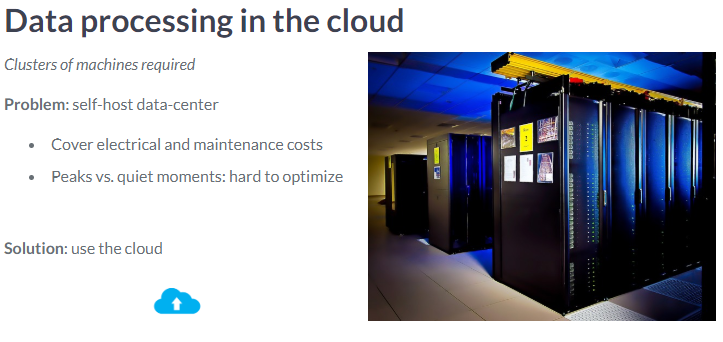

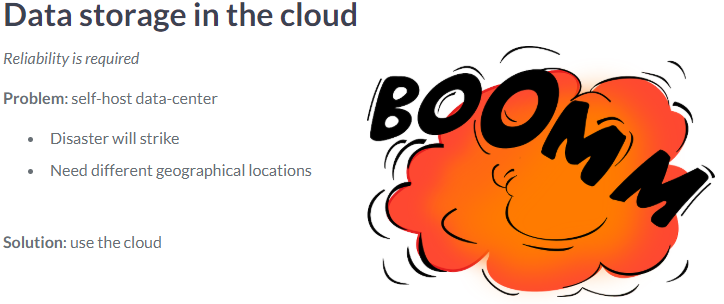

The Big 3 Cloud Service Providers are: <br>
AWS, Azure and Google <br>

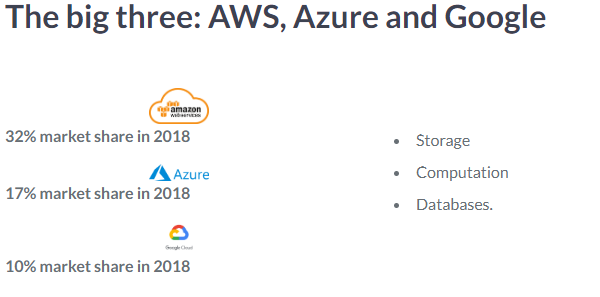

They Help in Services such as <br>
- Storage (AWS S3, Azure Blob Storage, Google Cloud Storage) <br>
- Computation (AWS EC2, Azure Virtual Machines, Google Compute Engine) <br>
- Databases (AWS RDS, Azure SQL Database, Google Cloud SQL)


The cloud can provide you with the resources you need, when you need them. This property of cloud computing is also called cloud elasticity.

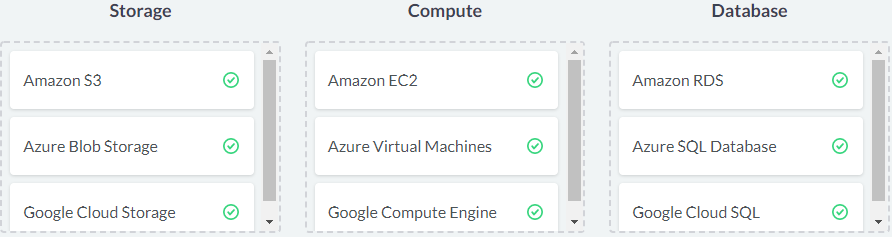

## Databases

- Large collection of Data organised especially for Rapid Search and Retrival (Merriam Webster)
- A Database Holds Data, Organises Data and Retrieve/Search Data through DBMS

The Difference Between Database and File Systems is that <br>
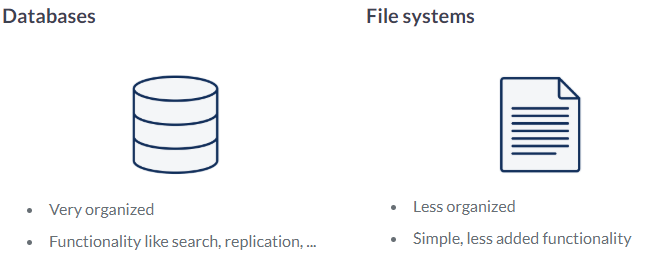

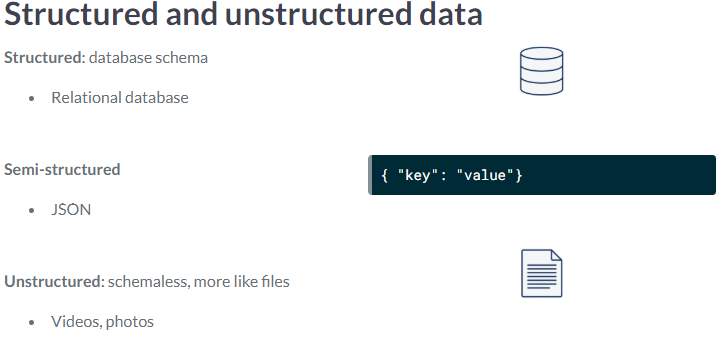

Some Key Differences between SQL and NoSQL Databases are

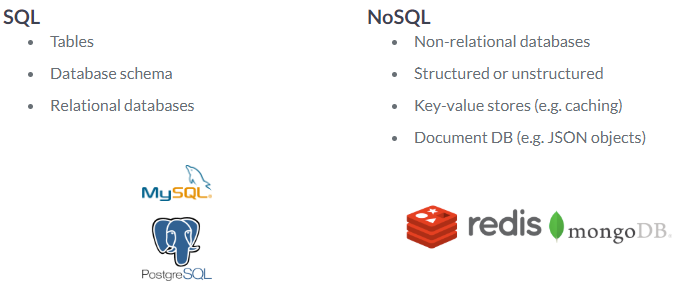

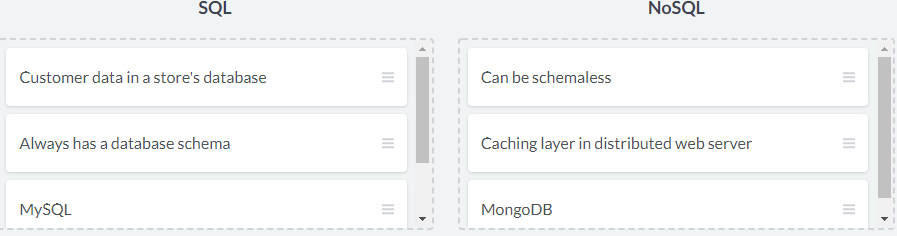

A Schema Describes a Structure and Relations of a Database. 

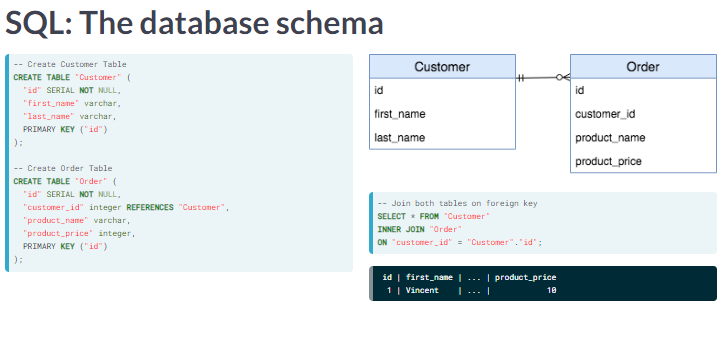

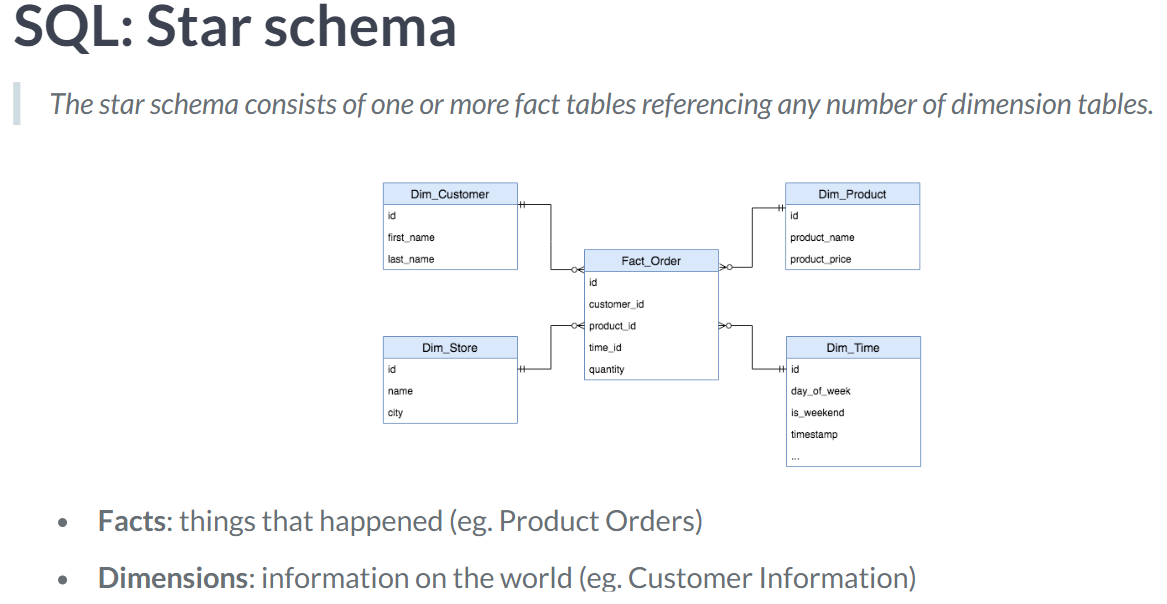

## Case Statements

Follow Diagram to SQL Database Schema Image 

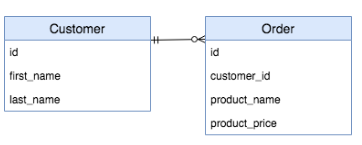


Database Schema for Customer and Order

A PostgreSQL database is set up in your local environment, which contains this database schema. It's been filled with some example data. You can use pandas to query the database using the read_sql() function. You'll have to pass it a database engine, which has been defined for you and is called db_engine.

The <b>pandas</b> package imported as pd will store the query result into a DataFrame object, so you can use any DataFrame functionality on it after fetching the results from the database.

Task 1: 

- Select the first_name and the last_name in the "Customer" table. 
- Make sure to order by the last name first and the first name second.
- Use the .head() method to show the first 3 rows of data.
- Use .info() to show some general information about data.

In [ ]:
# SQL Statements: 

data = pd.read_sql("""
            SELECT first_name, last_name FROM "Customer" 
            ORDER BY last_name, first_name
            """, db_engine)

print(data.head(data))

print(data.info())

Task 2:
- Join the "Customer" with the "Order" table.
- Print the id column of data. What do you see?

In [ ]:
# SQL Statements:

data = pd.read_sql(""" 
                SELECT * FROM "Customer" 
                INNER JOIN "Order" 
                ON "Order"."customer_id"="Customer"."id" 
                """, db_engine)
print(data.id)

## Paralell Computing <br>


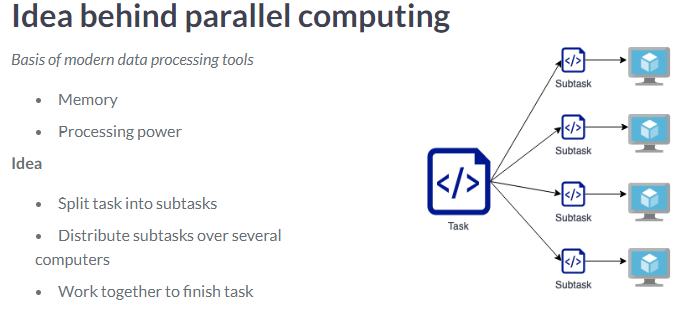

Example Case:

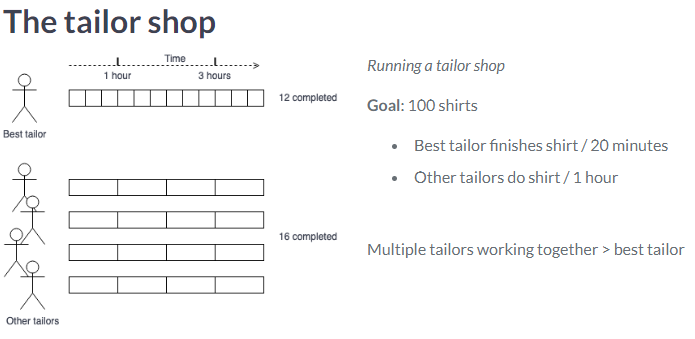

Similar is the Case of Big Data Processing Tasks

Some Benifits of Paralell Computing are:
- Memory (partitioning the Dataset)
- Processing Power

Risks of Paralell Computing
- Overhead due to Communication
- Tasks must be large (else not worth splitting up)
- Need Several Processing unit
- Paralell Slowdown tend to Happen
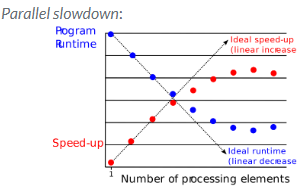

Example Case: <br>

Distributing Loads on all Processing Units <br> 

Subtask: Yearwise Average age of all Participants <br>
Solution: You can do this by Groupby and Apply


You Can do this by Pool and Dask packages. Partition is 4

Pool:
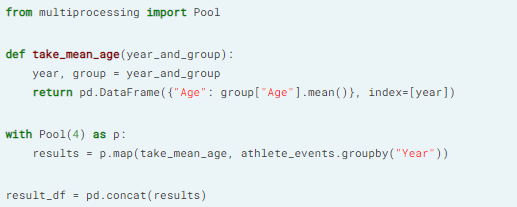

Dask:
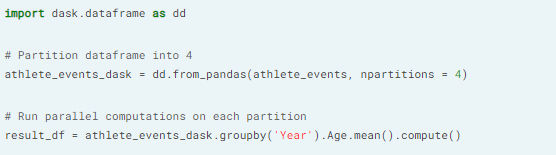

In summary, Parallel computing can optimize the use of multiple processing units and Parallel computing can also optimize the use of memory between several machines., But you can't split every task successfully into subtasks. Additionally, some tasks might be too small to benefit from parallel computing due to the communication overhead.

## Case Statements

Use parallel computing to apply the function take_mean_age() that calculates the average athlete's age in a given year in the Olympics events dataset. The DataFrame athlete_events has been loaded for you and contains amongst others, two columns:

Year: the year the Olympic event took place
Age: the age of the Olympian

You will be using the multiprocessor.Pool API which allows you to distribute your workload over several processes. The function parallel_apply() is defined in the sample code. It takes in as input the function being applied, the grouping used, and the number of cores needed for the analysis. Note that the @print_timing decorator is used to time each operation.

Task 1:
- Apply take_mean_age with 1 core first, then 2 and finally 4 cores.

In [ ]:
# Function to apply a function over multiple cores
@print_timing
def parallel_apply(apply_func, groups, nb_cores):
    with Pool(nb_cores) as p:
        results = p.map(apply_func, groups)
    return pd.concat(results)

# Parallel apply using 1 core
parallel_apply(take_mean_age, athlete_events.groupby('Year'), 1)

# Parallel apply using 2 cores
parallel_apply(take_mean_age, athlete_events.groupby('Year'), 2)

# Parallel apply using 4 cores
parallel_apply(take_mean_age, athlete_events.groupby('Year'), 4)

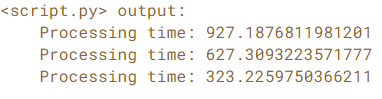

For educational purposes, we've used a little trick here to make sure the parallelized version runs faster.  <br>
In reality, using parallel computing wouldn't make sense here since the computations are simple and the dataset is relatively small. Communication overhead costs the multiprocessing version its edge!

A more convenient way to parallelize an apply over several groups is using the dask framework and its abstraction of the pandas DataFrame, for example.
The pandas DataFrame, athlete_events is available in your workspace.

Task 2:

- Create 4 partitions of the athletes_events DataFrame using dd.from_pandas()
- Print out the mean age for each Year. Remember dask uses lazy evaluation.

In [ ]:
# Solution 
import dask.dataframe as dd

# Set the number of partitions
athlete_events_dask = dd.from_pandas(athlete_events, npartitions = 4)

# Calculate the mean Age per Year
print(athlete_events_dask.groupby('Year').Age.mean().compute())

## Paralell Computing Frameworks

Hadoop - Collection of Open Source projects maintained by Apache Software Foundations. 2 Common methods are HDFS and Mapreduce

HDFS - Distributed File System, Files Reside on Multiple Different Computers. Essential for Paralell computing and Big Data.
Nowadays, Amazon S3 replaces HDFS <br>

Mapreduce - Splits Tasks into Subtasks, Distributing the Workload and Data between Several Processing Units(These Processing Units are Similar to Several Computers in a Cluster). But, it was tough to Write Mapreduce jobs, This was overcome by Hive

Hive - Layer on top of Hadoop Ecosystem. Runs on Hadoop and uses HiveSQL. Created by FB, but maintained by Apache SF. Initially Mapreduce was responsible for Running the HIVE Job, Now other Data processing tools does the job

Spark - Distributes Data Processing tasks between Clusters of Computers. Spark Avoids Disk Writes(Mapreduce can't), Spark is In Memory Processing System. Spark was originated from University of California, but maintained by Apache SF. Spark Relies on RDD (Resiliant Distributed Database - Data structure that maintains Data which is distributed between multiple nodes. RDD's are Similar to List of Tuples. We can do Transformations [.map() or .filter()] and Actions [.count() or .first()]). Transformation results in Transformed RDD's and Actions results in a Single Result

Pyspark - Python Interface to Spark. It hosts a Dataframe Abstraction, where you can perform operations similar to Pandas Dataframe. Pyspark and Spark takes care of All Complex Paralell Computing Operations

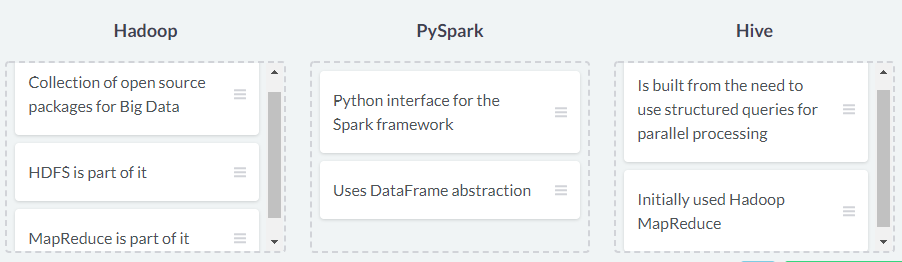

## Case Statements:

Use the PySpark package to handle a Spark DataFrame. The data is the same as in previous exercises: participants of Olympic events between 1896 and 2016. The Spark Dataframe, athlete_events_spark is available in your workspace.

The methods you're going to use in this exercise are: <br>
.printSchema(): helps print the schema of a Spark DataFrame.<br>
.groupBy(): grouping statement for an aggregation.<br>
.mean(): take the mean over each group.<br>
.show(): show the results.<br>

Task 1:
- Find out the type of athlete_events_spark.
- Find out the schema of athlete_events_spark.
- Print out the mean age of the Olympians, grouped by year. Notice that spark has not actually calculated anything yet. You can call this lazy evaluation.
- Take the previous result, and call .show() on the result to calculate the mean age.

In [ ]:
# Print the type of athlete_events_spark
print(type(athlete_events_spark))

# Print the schema of athlete_events_spark
print(athlete_events_spark.printSchema())

# Group by the Year, and find the mean Age
print(athlete_events_spark.groupBy('Year').mean('Age'))

# Group by the Year, and find the mean Age
print(athlete_events_spark.groupBy('Year').mean('Age').show())

You can Run a Pyspark file using <e>spark-submit</e>

## Workflow Scheduling Frameworks

DAG (Directed Acyclic Graphs) are Set of Nodes connected by Directed Edges with No Cycles. Some Tools for Scheduling are <br>
- Linux CRON
- Spotifys' Luigi
- Apache Airflow 

Airbnb Created Airflow as Internal workflow management. They built Airflow around the Concept of DAG's. 

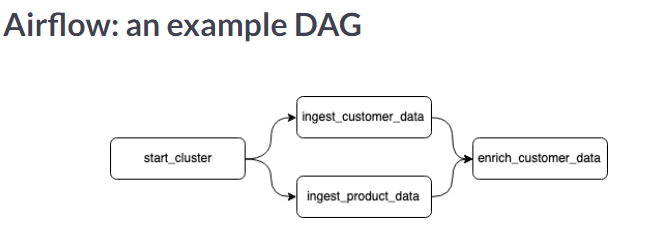

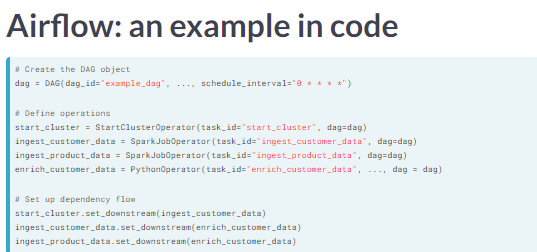

## Case Statements:

In Airflow, a pipeline is represented as a Directed Acyclic Graph or DAG. The nodes of the graph represent tasks that are executed. The directed connections between nodes represent dependencies between the tasks.

Representing a data pipeline as a DAG makes much sense, as some tasks need to finish before others can start. You could compare this to an assembly line in a car factory. The tasks build up, and each task can depend on previous tasks being finished. A fictional DAG could look something like this:

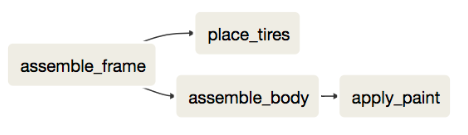

Assembling the frame happens first, then the body and tires and finally you paint. Let's reproduce the example above in code.



Task 1:
- First, the DAG needs to run on every hour at minute 0. Fill in the schedule_interval keyword argument using the crontab notation. For example, every hour at minute N would be N * * * *. Remember, you need to run at minute 0.
- The downstream flow should match what you can see in the image above. The first step has already been filled in for you.

In [ ]:
# Solution

# Creating the DAG object
dag = DAG(dag_id="car_factory_simulation",
          default_args={"owner": "airflow","start_date": airflow.utils.dates.days_ago(2)},
          schedule_interval="0 * * * *")

# Task definitions
assemble_frame = BashOperator(task_id="assemble_frame", bash_command='echo "Assembling frame"', dag=dag)
place_tires = BashOperator(task_id="place_tires", bash_command='echo "Placing tires"', dag=dag)
assemble_body = BashOperator(task_id="assemble_body", bash_command='echo "Assembling body"', dag=dag)
apply_paint = BashOperator(task_id="apply_paint", bash_command='echo "Applying paint"', dag=dag)

# Complete the downstream flow
assemble_frame.set_downstream(place_tires)
assemble_frame.set_downstream(assemble_body)
assemble_body.set_downstream(apply_paint)

# End of Part 1